# Chronic Kidney Disease Prediction

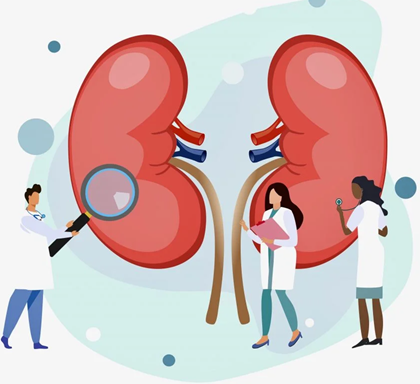

In [1]:
from PIL import Image
Image.open('Kidney-Disease-Day.png')

<h3>Overview</h3>
  <p>Kidney Disease is a disease which also known as kidney failure. This happens when kidney gradually losses its main functionality to filter the blood. It also increases the risk of problelms like heart disease and stroke.</p>

<h3>Functionalties of Kidney</h3>
<ol>
 <li>
    Removing natural waste products and extra water from your body</li>
    <li>Helping make red blood cells</li>
    <li>Balancing important minerals in your body</li>
    <li>Helping maintain your blood pressure</li>
    <li>Keeping your bones healthy</li>

</ol>

<h3>Symptoms</h3>
<ol>
<li>Foamy urine</li>
<li>Urinating (peeing) more often or less often than usual</li>
<li>Itchy and/or dry skin</li>
<li>Feeling tired</li>
<li>Loss of appetite</li>
<li>Weight loss without trying to lose weight</li>
</ol>

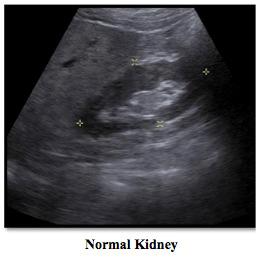

In [2]:
Image.open("ckdNormal.png")

<h4>Figure shows a healthy kidney</h4>

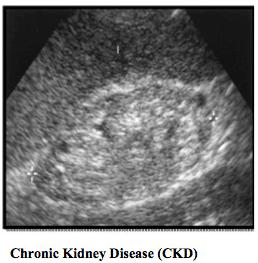

In [3]:
Image.open("ckdDamaged.jpg")

<h4>Figure shows a CKD affected kidney</h4>

<h3>Causes</h3>
<ol>
<li>Blood Pressure: The kidneys are not able to filter out all the waste and fluid material from the blood if the blood pressure is high. the waste present in the blood cause higher blood pressure which makes an dangerous cycle leads to kidney failure.<br>high hypertension as a blood pressure at or above 130/80 mm Hg</li>
<li>Specific Gravity: It is a measurement of the concerntration of solute/waste in the fluid/urine. the higher SP says the body is dehydrated and lower SG says that the kidney has loosen its functionality. The Specifict Gravity result ranges from 1.005 to 1.030 </li>
<li>Albumin: It is the main protien found in our blood produced by the liver. Having low serum albumin levels in CKD is associated with a higher risk of progression to kidney failure. The Normal Range (3.4-5.4 g/dL) </li>
<li>Sugar Level: Excess amount of sugar in blood damages tiny blood vessels in kidney causes reduction of waste filtering capacity which further leads to kidney damage. The normal sugar level id less than 100 mg/dL (milligrams per deciliter) </li>
<li>Red Blood Cell: The kidney produces a hormone called erythropoietin (EPO) that stimulate the bone marrow to produce the RBC. If there is a ckd then the hormone cannot be produced properly causing low production of RBC.</li>
<li>Blood Urine: It is a test used to detect CKD. Glomerular filtration rate estimated measurement reflects how well your kidneys filter waste products from your blood. A GFR below 60 mL/min/1.73 m² for several months is a strong indicator of CKD. </li>
<li>Serum creatinine: It is a waste product produced by the breakdown of creatine,a molecule found in muscles that helps them produce energy. Healthy kidneys efficiently filter creatinine from the blood and excrete it in the urine.<br>Normal ranges typically fall between:<br>0.7-1.3 mg/dL for men<br>0.6-1.1 mg/dL for women</li>
<li>Sodium level: The kidney plays an crucial role in regulating the Sodium and fluid balance in the body. It regulates how much sodium is reabsorbed by the blood and and how much excreted by the urine.<br> It has a daily upper limit of 2,300 mg for adults.</li>
<li>Potasium level: It helps maintain fluid balance, nerve impulses, and muscle contractions. High potassium (hyperkalemia) is more common in advanced CKD stages when the kidneys struggle to remove excess potassium from the blood.<br>The normal Potasium level in an human body ranges from 3.5 to 5.2 millimoles per liter (mmol/L).</li>
<li>Hemoglobin: It a protein within red blood cells (RBCs),
is responsible for carrying oxygen throughout your body. It binds to oxygen in your lungs and releases it to your tissues, ensuring proper cellular function.<br>Men: 13.2 to 16.6 grams per deciliter (g/dL)<br>Women: 11.6 to 15 grams per deciliter (g/dL)</li>
<li>White Blood Cell Count: WBCs are part of the immune system's defense team, fighting infections and inflammation. An elevated WBC count (leukocytosis) often indicates inflammation somewhere in the body.<br>In a healthy human body the WBC count can be fall in the range of 4,500 to 11,000 cells per microliter (mcL)</li>
<li>RBC Count: Men: 4.7 to 6.1 million RBCs/mcL with a hematocrit of 40.7% - 50.3%<br>Women: 4.2 to 5.4 million RBCs/mcL with a hematocrit of 36.1% - 46.3%</li>
<li>Hypertension: Also known as high blood pressure, is a chronic condition where blood pressure stays consistently elevated above a healthy range</li>
<li>Class: It is the target shows 1 for ckd and 0 for not a ckd</li>
</ol>

Data from https://www.kidney.org/atoz/content/about-chronic-kidney-disease and google Gemini

<h3>Aim</h3>
<p>This project aims to find a best fit model for the prediction with a higher accuracy score.</p>
<p>More precisely predict the presence and absence of Chronic Kidney Disease.</p>

<h3>Procedure Follows</h3>

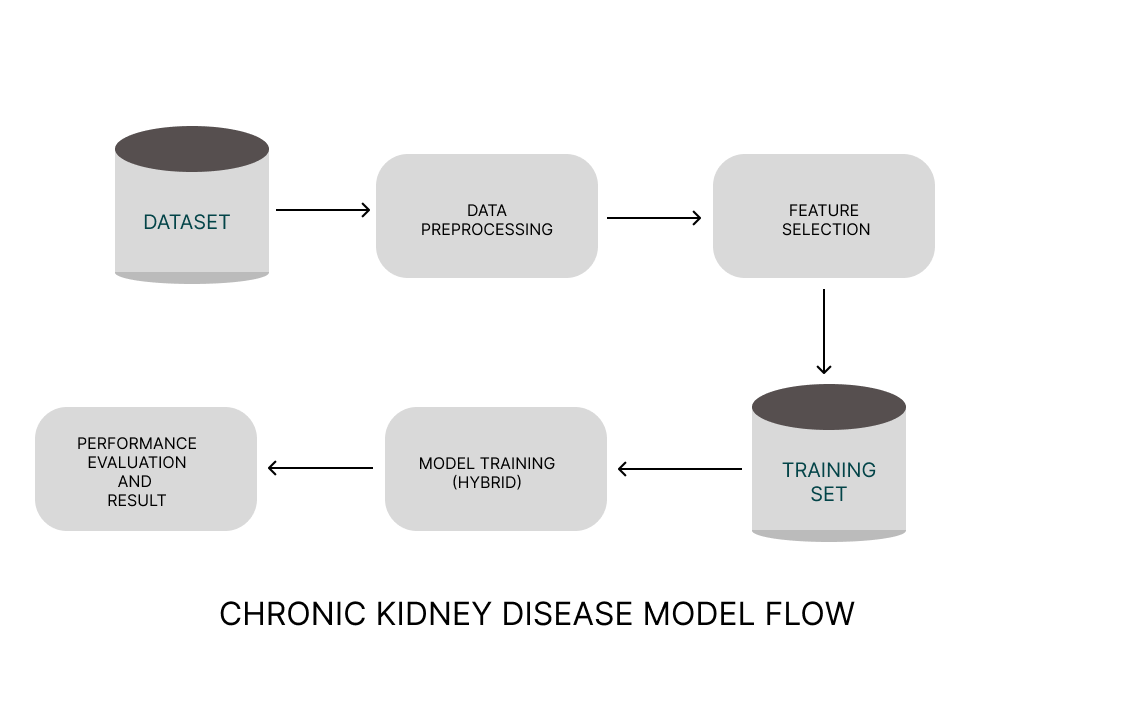

In [4]:
Image.open("CKDIMODELFLOW.png")

# Importing libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from keras.models import Sequential
from keras.layers import Dense,Dropout,MaxPooling2D,Conv2D,Flatten
from keras.optimizers import Adam
import keras
from keras.models import load_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import tpot
np.random.seed(1)
warnings.filterwarnings("ignore")

### This dataset is downloaded from https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

In [6]:
df = pd.read_csv("new_model.csv")

In [7]:
df.head(5)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


# finding missing values

In [8]:
print(df.isna().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


### No null values found

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


### Only numerical data is present 

# Analysis

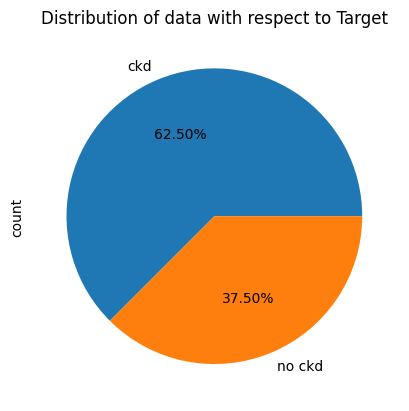

In [10]:
df.Class.value_counts().plot.pie(autopct="%1.2f%%",labels=["ckd","no ckd"])
plt.title("Distribution of data with respect to Target")
plt.show()

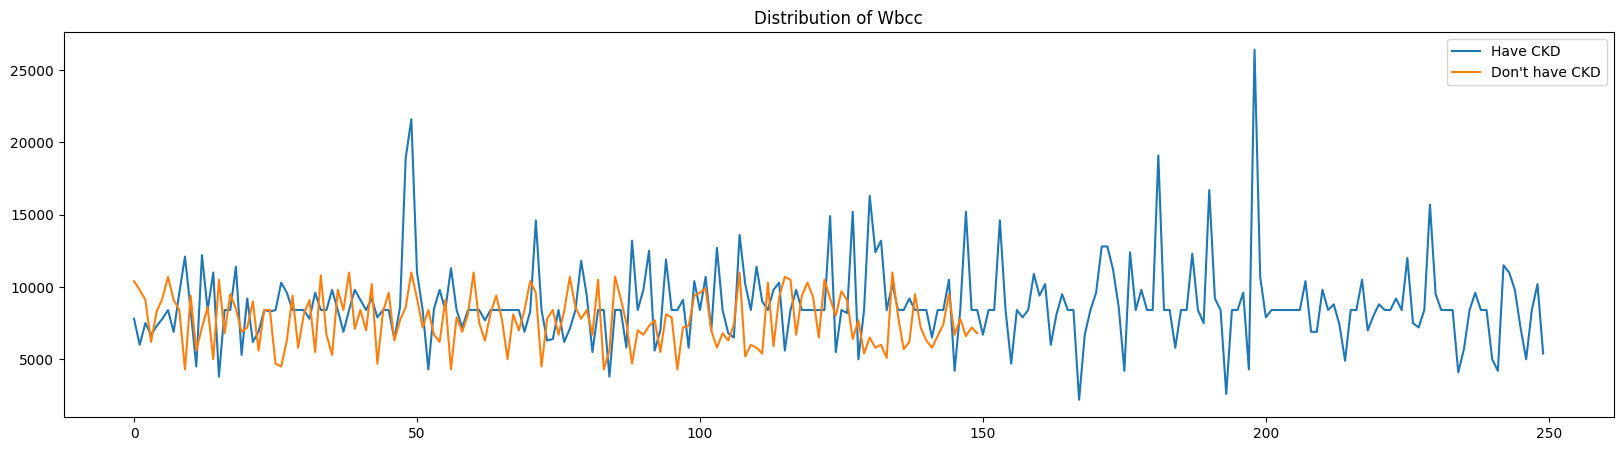

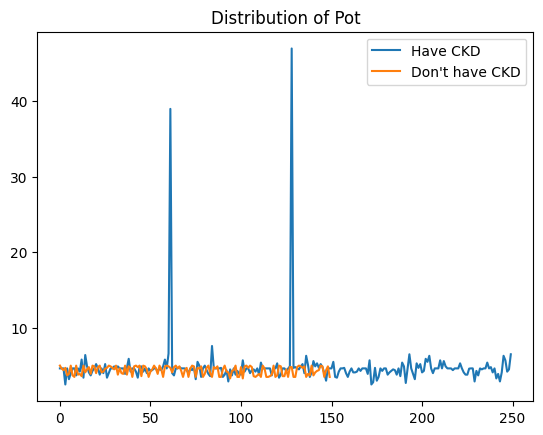

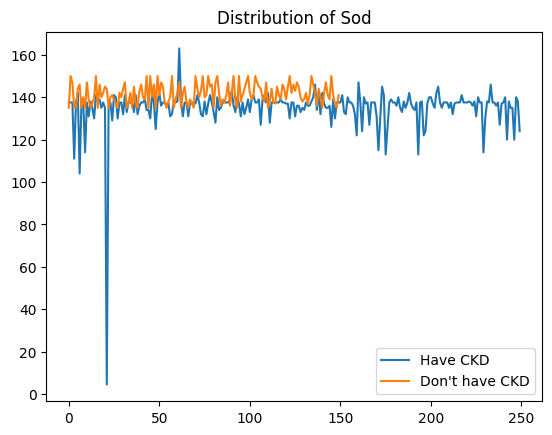

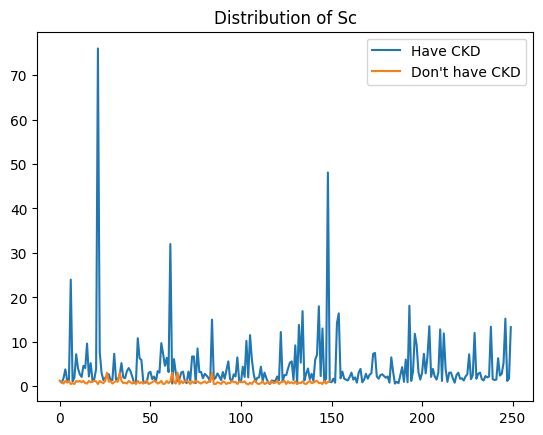

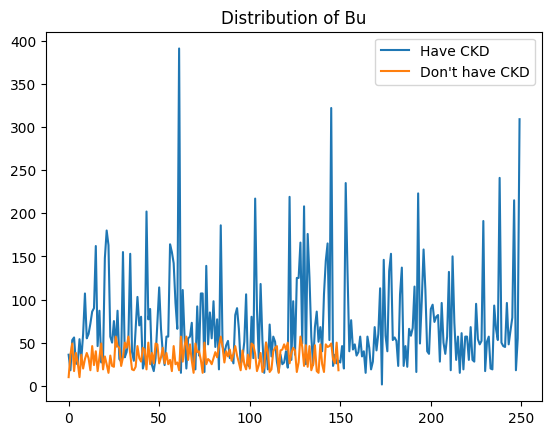

In [11]:
# Distribution of wbc
plt.figure(figsize=(20,5))
for i in df[["Wbcc","Pot","Sod","Sc","Bu"]]:
    ckd=df[df.Class==1].loc[:,i]
    nckd=df[df.Class==0].loc[:,i]
    plt.plot(np.arange(len(ckd)),ckd,label="Have CKD")
    plt.plot(np.arange(len(nckd)),nckd,label="Don't have CKD")
    plt.legend()
    plt.title("Distribution of "+i)
    plt.show()

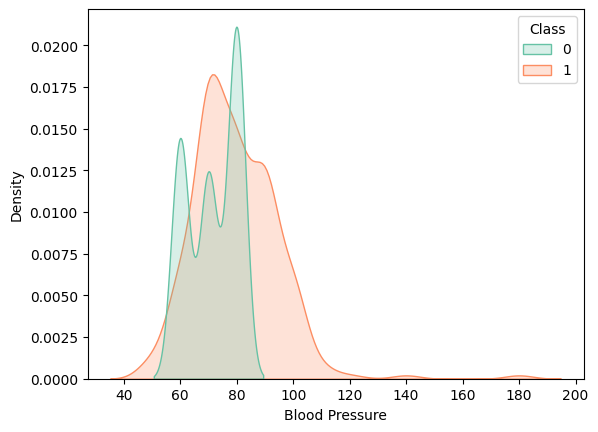

In [12]:
# Density of blood pressure in the data frame having ckd
data =df[df.Class==1]["Bp"]
sns.kdeplot(data=df,x="Bp",hue="Class",fill=True,palette="Set2")
plt.xlabel("Blood Pressure")
plt.show()

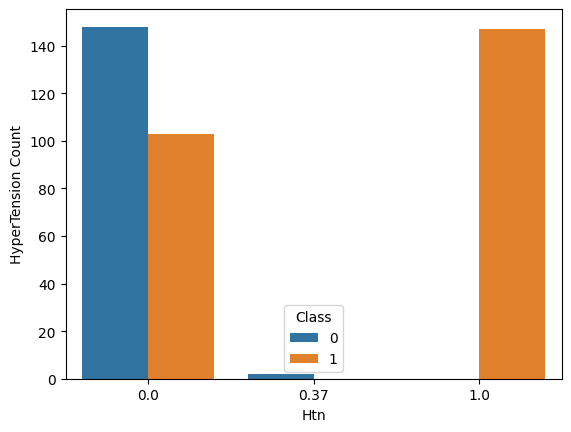

In [13]:
# Distribution hypertension rate 
sns.countplot(data=df,x="Htn",hue="Class")
plt.ylabel("HyperTension Count")
plt.show()

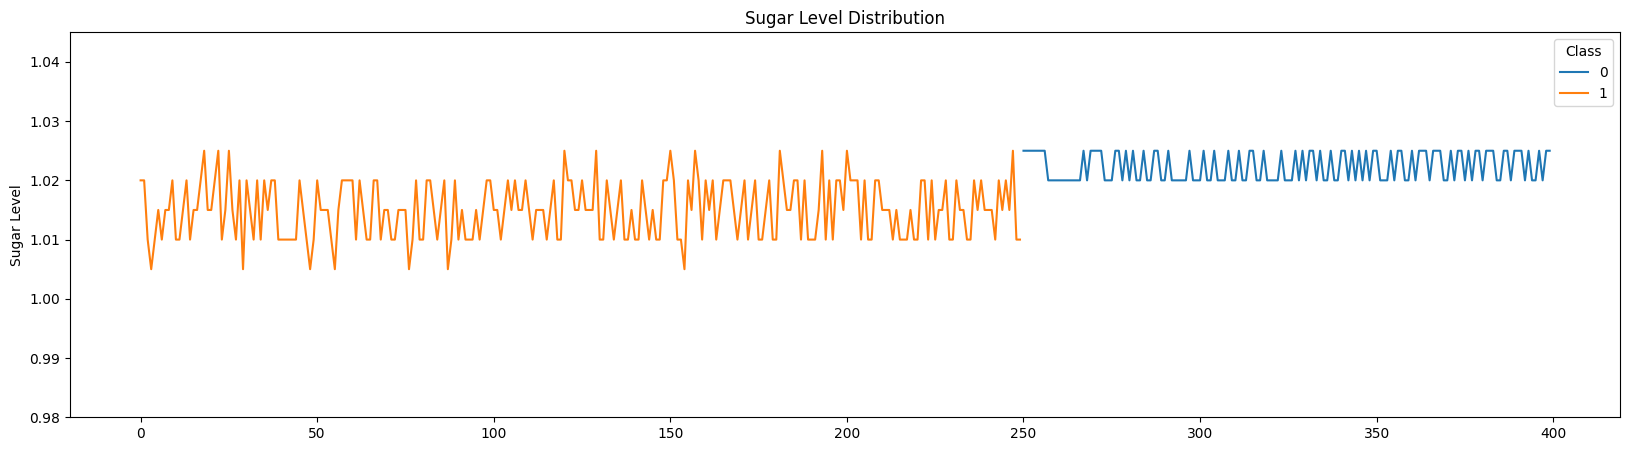

In [14]:

plt.figure(figsize=(20,5))
plt.title("Sugar Level Distribution")
sns.lineplot(data=df,x=np.arange(df.shape[0]),y="Sg",hue="Class")
plt.ylabel("Sugar Level")
plt.ylim(df.Sg.min()-0.025,df.Sg.max()+0.02)
plt.show()

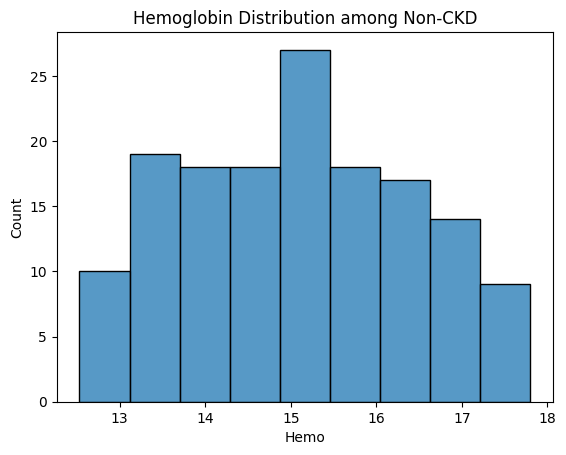

In [15]:
plt.title("Hemoglobin Distribution among Non-CKD")
data = df[df.Class==0]["Hemo"]
sns.histplot(data)
plt.show()


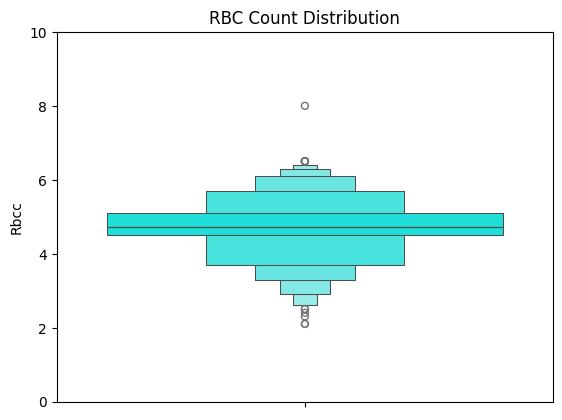

In [16]:
plt.title("RBC Count Distribution")
sns.boxenplot(df.Rbcc,palette="hsv")
plt.ylim(0,10)
plt.show()

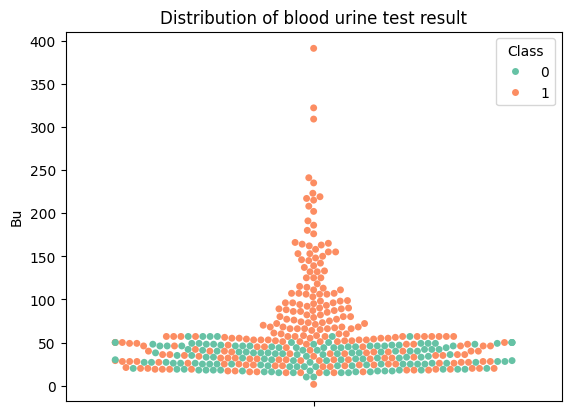

In [17]:
sns.swarmplot(data=df,y="Bu",palette="Set2",hue="Class")
plt.title("Distribution of blood urine test result")
plt.show()

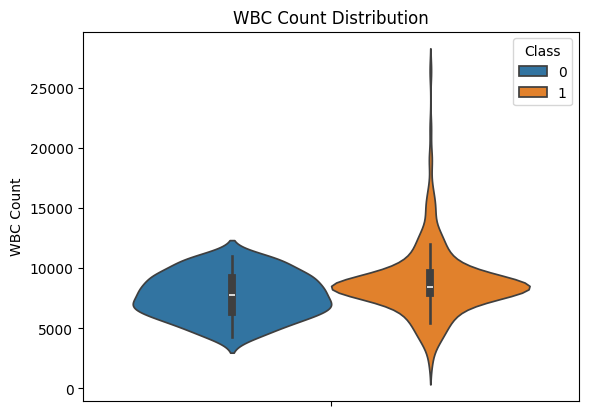

In [18]:
sns.violinplot(data=df,y="Wbcc",hue="Class")
plt.title("WBC Count Distribution")
plt.ylabel("WBC Count")
plt.show()

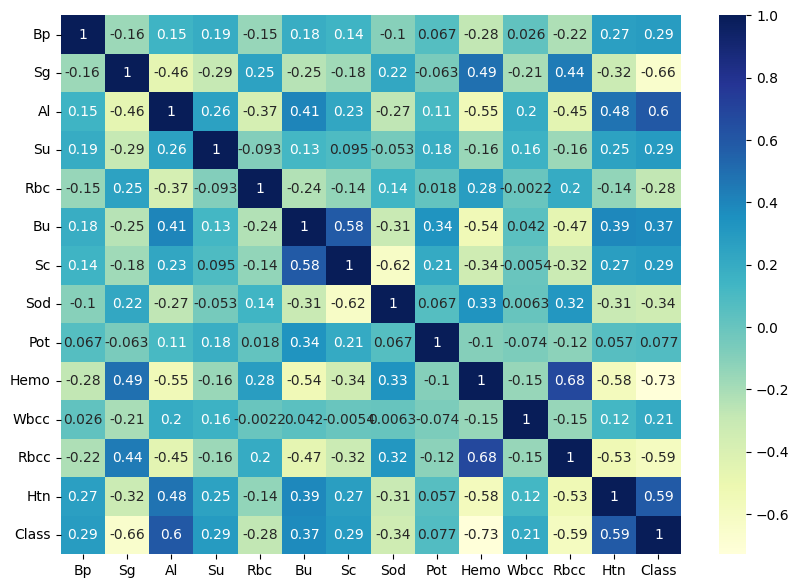

In [61]:
# finding corelations
cor = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor,cmap="YlGnBu",annot=True)

plt.show()

# ML Modeling and Prediction

### splitting train and test data using holdout method

In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### xtrain and ytrain dimention

In [22]:
print(xtrain.shape,ytrain.shape)

(320, 13) (320,)


### xtest and ytest dimention

In [23]:
print(xtest.shape,ytest.shape)

(80, 13) (80,)


In [24]:
# function to find report of classification models
def find_report(model):
    global xtest,ytest
    print("Accuracy score :",accuracy_score(ytest,model.predict(xtest)))
    print("F1 score :",f1_score(ytest,model.predict(xtest)))

In [25]:
params = {
    "max_depth": [3, 4, 5, 10, None],
    "max_features": [1,4,5,10,13],
    "min_samples_leaf": [1,2,4,5,7,9],
    "criterion": ["gini", "entropy"]
}
# Parameters

In [26]:
# Training with Randomized search CV
RSCV = RandomizedSearchCV(RandomForestClassifier(),param_distributions=params,cv=4)

In [27]:
RSCV.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 10, None],
                                        'max_features': [1, 4, 5, 10, 13],
                                        'min_samples_leaf': [1, 2, 4, 5, 7, 9]})

In [28]:
print("Best Parameters:",RSCV.best_params_)
print("Best Score :",RSCV.best_score_)
BP = RSCV.best_params_

Best Parameters: {'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 5, 'criterion': 'gini'}
Best Score : 0.984375


## Training with Random forest classifier

In [29]:
RF = RandomForestClassifier(min_samples_leaf=BP['min_samples_leaf'], max_features=BP['max_features'], max_depth= BP['max_depth'], criterion=BP['criterion'])

In [30]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=2)

### Final Score

In [31]:
find_report(RF)

Accuracy score : 1.0
F1 score : 1.0


# Learn with neural network

## model creation

In [32]:
model = Sequential()
model.add(Dense(units=32,activation="relu",input_shape=(xtrain.shape[1],)))
# model.add(Dense(units=8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
# model compilation with adam optimizer
model.compile(Adam(),loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
# fitting values to model
model.fit(xtrain,ytrain,epochs=100,verbose=0)

In [36]:
# evaluating model
evaluation = model.evaluate(xtest,ytest,verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8969 - loss: 0.2674 


In [37]:
ann_accuracy = evaluation[1]
ann_loss = evaluation[0]

In [38]:
# showing accuracy and loss
print('ann loss:',ann_loss)
print('ann accuracy:',ann_accuracy)

ann loss: 0.30737733840942383
ann accuracy: 0.887499988079071


In [39]:
prediction = model.predict(xtest)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [40]:
prediction = (prediction>0.5).astype("int")

In [41]:
# saving model for further use (if any)
model.save("annModel.keras")

# Using Traditional ML algorithm (Hybrid Modeling)

In [42]:
model = load_model(r"./annModel.keras")

In [43]:
# traditional models 
R=RandomForestClassifier()
logisticR = LogisticRegression()
BNB = BernoulliNB()
supportVC = SVC(probability=True)
KNN = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

logisticR.fit(xtrain,ytrain)
BNB.fit(xtrain,ytrain)
dtc.fit(xtrain,ytrain)
supportVC.fit(xtrain,ytrain)
KNN.fit(xtrain,ytrain)
# model.fit(xtrain,ytrain)


KNeighborsClassifier()

In [44]:
### training with 2 models
train_proba = np.column_stack([supportVC.predict_proba(xtrain),KNN.predict_proba(xtrain)])
test_proba = np.column_stack([supportVC.predict_proba(xtest),KNN.predict_proba(xtest)])
model2 = MLPClassifier()
model2.fit(train_proba,ytrain)
print("accuracy score:",model2.score(test_proba,ytest))

accuracy score: 0.7


In [45]:
### training with 3 models
train_proba = np.column_stack([supportVC.predict_proba(xtrain),KNN.predict_proba(xtrain),BNB.predict_proba(xtrain)])
test_proba = np.column_stack([supportVC.predict_proba(xtest),KNN.predict_proba(xtest),BNB.predict_proba(xtest)])
model3 = MLPClassifier()
model3.fit(train_proba,ytrain)
print("accuracy score:",model3.score(test_proba,ytest))

accuracy score: 0.875


In [46]:
### train with 4 models
train_proba = np.column_stack([supportVC.predict_proba(xtrain),KNN.predict_proba(xtrain),BNB.predict_proba(xtrain),dtc.predict_proba(xtrain)])
test_proba = np.column_stack([supportVC.predict_proba(xtest),KNN.predict_proba(xtest),BNB.predict_proba(xtest),dtc.predict_proba(xtest)])
model3 = MLPClassifier()
model3.fit(train_proba,ytrain)
print("accuracy score:",model3.score(test_proba,ytest))

accuracy score: 0.95


In [47]:
### train with 5 models
train_proba = np.column_stack([supportVC.predict_proba(xtrain),KNN.predict_proba(xtrain),BNB.predict_proba(xtrain),logisticR.predict_proba(xtrain),dtc.predict_proba(xtrain)])
test_proba = np.column_stack([supportVC.predict_proba(xtest),KNN.predict_proba(xtest),BNB.predict_proba(xtest),logisticR.predict_proba(xtest),dtc.predict_proba(xtest)])
model5 = MLPClassifier()
model5.fit(train_proba,ytrain)
print("accuracy score:",model5.score(test_proba,ytest))
acc=model5.score(test_proba,ytest)

accuracy score: 0.9625


## fitting with tree-based pipeline optimization tool

In [50]:
tpotModel = tpot.TPOTClassifier(generations=10,population_size=20,verbosity=0)
tpotModel.fit(train_proba,ytrain)
print("Score from genetic model:",tpotModel.score(test_proba,ytest))


Score from genetic model: 0.95


## Using MLPClassifire with 5 model as main model

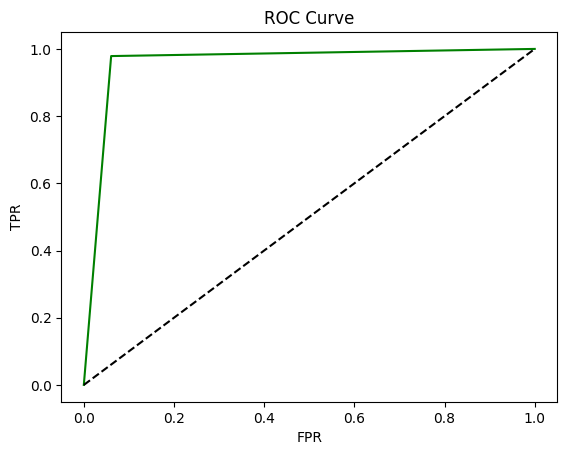

In [51]:
# ROC Curve
fpr,tpr,thresh = roc_curve(ytest,model5.predict(test_proba))
plt.plot(fpr,tpr,color='g')
plt.plot((0,1),(0,1),"k--")
plt.title("ROC Curve")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [52]:
# Perfermance Metrics
auc = roc_auc_score(ytest,model5.predict(test_proba))
print("Trained With MLP Classifier")
print("Area Under Curve:",auc)
print("F1 Score:",f1_score(ytest,model5.predict(test_proba)))


Trained With MLP Classifier
Area Under Curve: 0.9590586718246293
F1 Score: 0.968421052631579


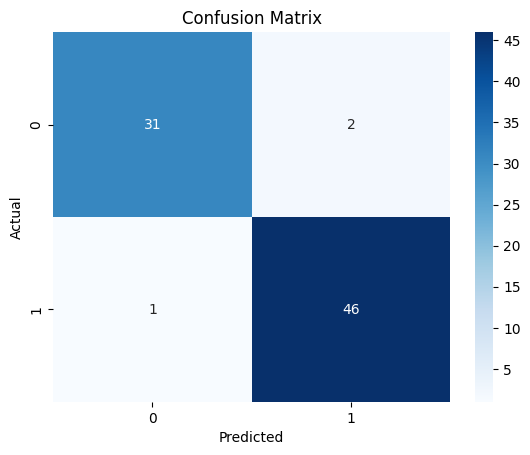

In [53]:
# confusion matrix
cm = confusion_matrix(ytest,model5.predict(test_proba))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# making data pipeline

In [54]:
def pipeline(x):
    x = np.array(x).reshape(1,-1)

    probaX = np.column_stack([supportVC.predict_proba(x),KNN.predict_proba(x),BNB.predict_proba(x),logisticR.predict_proba(x),dtc.predict_proba(x)])
    predict = model5.predict(probaX)
    proba = model5.predict_proba(probaX)
    return (predict,proba)

In [55]:
result = pipeline([80,1.02,0,0,1,16,0.7,138,3.5,13.7,5400,5.8,0])
proba = result[1].max().round(2)*100
if result[0][0] == 1:
    print(f"{proba}% probability, You have Chronic Kidney Disease :-(")
else:
    print(f"{proba}% probability, You dont have Chronic Kidney Disease :-)")


100.0% probability, You dont have Chronic Kidney Disease :-)


# Conclusion

In [56]:
print("Chronic Kidney Disease is a dangerous and common disease these days. Early detection and prevention are essential. For detection, we can use my machine learning model, which has an accuracy of",str(acc*100)+"%.","This model was trained over several data points to make the best decision on CKD prediction. Hence, instead of using inaccurate manual detection, the use of an ML model is effective and accurate in terms of results.")

Chronic Kidney Disease is a dangerous and common disease these days. Early detection and prevention are essential. For detection, we can use my machine learning model, which has an accuracy of 96.25%. This model was trained over several data points to make the best decision on CKD prediction. Hence, instead of using inaccurate manual detection, the use of an ML model is effective and accurate in terms of results.
